<a href="https://colab.research.google.com/github/Manav054/testrepo/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [50]:
!pip install -q keras

In [51]:
# Importing libraries :

import numpy as np
import matplotlib.pyplot as py
import pandas as pd
import matplotlib.pyplot as plt
import io

# Importing keras library and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [53]:
# Importing dataset :

dataset = pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 5]
print(X)
print(y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virgin

In [54]:
# Dropping unnecessary columns

X = X.drop(['Id'], axis = 1)
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [59]:
# Splitting the dataset into the Training set and The Testing set :

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [60]:
# Initialising the ANN

classifier = Sequential()

# Adding the input layer and the first and only hidden layer
classifier.add(Dense(units = 4, input_shape =(4,), activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 3, activation = 'softmax'))

In [67]:
# compiling the ANN

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# fitting the ANN to the Training set

model_history = classifier.fit(xtrain, ytrain , batch_size = 1, validation_split = 0.1, epochs = 21)

Epoch 1/21
108/108 [==============================] - 1s 4ms/step - loss: 0.0736 - accuracy: 0.9815 - val_loss: 0.0999 - val_accuracy: 0.9167
Epoch 2/21
108/108 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9722 - val_loss: 0.1227 - val_accuracy: 0.9167
Epoch 3/21
108/108 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9722 - val_loss: 0.0851 - val_accuracy: 0.9167
Epoch 4/21
108/108 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9815 - val_loss: 0.1214 - val_accuracy: 0.9167
Epoch 5/21
108/108 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9815 - val_loss: 0.1257 - val_accuracy: 0.9167
Epoch 6/21
108/108 [==============================] - 0s 3ms/step - loss: 0.0756 - accuracy: 0.9630 - val_loss: 0.1011 - val_accuracy: 0.9167
Epoch 7/21
108/108 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9630 - val_loss: 0.1454 - val_accuracy: 0.9167
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


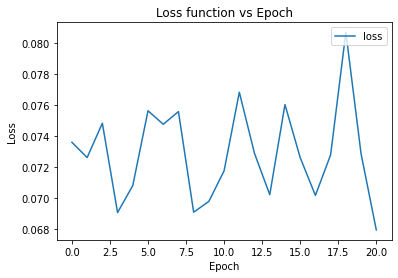

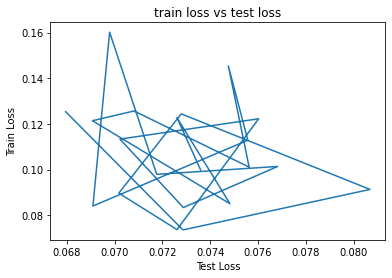

Train Accurary :  0.9814814925193787
Test Accuracy :  0.9166666865348816


In [84]:
# listing all data in history

print(model_history.history.keys())

# summarizing history for accuracy

plt.plot(model_history.history['loss'])
plt.title('Loss function vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper right')
plt.show()

train_loss = model_history.history['loss']
test_loss = model_history.history['val_loss']
plt.plot(train_loss, test_loss)
plt.title('train loss vs test loss')
plt.ylabel('Train Loss')
plt.xlabel('Test Loss')
plt.show()

print("Train Accurary : ", max(model_history.history['accuracy']))
print("Test Accuracy : ", max(model_history.history['val_accuracy']))

In [79]:
# making the predictions and evaluating the model

# Predicting test set results
ypred = classifier.predict(xtest)
y_test_class = np.argmax(ytest, axis = 1)
y_pred_class = np.argmax(ypred, axis = 1)

# making the confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_class,y_pred_class)
print(cm)
cr = classification_report(y_test_class, y_pred_class)
print(cr)

predicted = encoder.inverse_transform(y_pred_class)
print("Final parameter values :")
print(predicted)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Final parameter values :
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']
